# Curso IBM Badge - Machine Learning Using Python

## Victor Hugo Negrisoli - Desenvolvedor Full-Stack Pleno & Analista de Dados

## Aprendizado Não-Supervisionado - Algoritmos de Agrupamento (Clustering): K-Means, Agrupamento Hierarquico e DBSCAN

In [59]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy.cluster.hierarchy import fcluster
%matplotlib inline

In [6]:
def configurar_plot(titulo, x, y, altura, largura):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(altura, largura)
    plt.show()

# Algoritmo K-Means

### Visualizando clusters

In [5]:
np.random.seed(0)

In [23]:
x[0:10]

array([[ 3.63796683,  5.25493765],
       [-0.37176353, -5.25618765],
       [ 3.0334163 , -2.93512401],
       [ 2.37690729,  3.88164677],
       [ 0.61535407, -3.51772573],
       [ 2.35710756, -3.86021005],
       [ 4.29526876,  4.43377848],
       [ 2.14515753,  4.70985502],
       [ 1.167202  , -4.1525793 ],
       [ 3.22060542,  4.04777014]])

In [24]:
y[0:10]

array([3, 1, 2, 3, 2, 2, 0, 3, 2, 3])

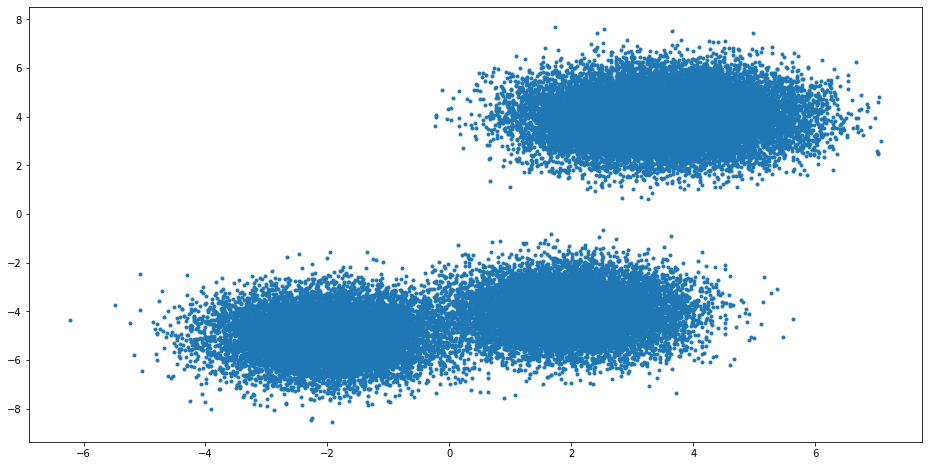

In [25]:
plt.scatter(x[:, 0], x[:, 1], marker = '.')
configurar_plot('', '', '', 16, 8)

## Inicializando o modelo do K-Means

In [26]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [27]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
k_means_labels = k_means.labels_
k_means_labels[0:15]

array([3, 1, 2, 0, 2, 2, 3, 0, 2, 0, 1, 1, 1, 3, 1])

In [31]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers[0:15]

array([[ 2.65653802,  3.93786023],
       [-2.0134297 , -4.9930474 ],
       [ 1.98874462, -4.00004666],
       [ 4.30757855,  4.06773288]])

## Criando uma segmentação de clientes com K-Means

In [37]:
dados = pd.read_csv('dados/Cust_Segmentation.csv')
dados.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [38]:
dados.drop('Address', axis = 1, inplace=True)
dados.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalizando o desvio padrão do Dataset

In [45]:
x = dados.values[:, 1:]
x = np.nan_to_num(x)
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [48]:
clustering_dataset = StandardScaler().fit_transform(x)

In [50]:
clustering_dataset[0:15]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  3.31184882,  5.35624866,  3.63890032,
         1.71609424, -0.52379654, -0.44250653],
       [ 0.61848622, -0.76634938,  2.13084447,  0.89107923, -0.27243814,
         1.39903102, -0.52379654,  0.10845868],
       [ 0.36962786,  0.31212243, -0.67404087,  0.24207204, -0.53413539,
        -0.77271955, -0.52379654, -1.27639982],
       [ 0.86734459,  1.39059423, -1.26454304,  0.44975434, -0.61085599,
         0.25501276, -0.52379654, -0.53185224],
       [-1.12352231, -0.76634938

### Criando o modelo

In [53]:
qtd_clusters = 3
k_means = KMeans(init = "k-means++", n_clusters = qtd_clusters, n_init = 12)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
labels = k_means.labels_
labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

### Definindo a coluna Clus_km como o resultado das labels definidas pelo algoritmo K-Means e agrupando pela colunas das labels

In [58]:
dados["Clus_km"] = labels
dados.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [60]:
dados.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


### Calculando a área (A = PI * R^2) para plotar o agrupamento no gráfico

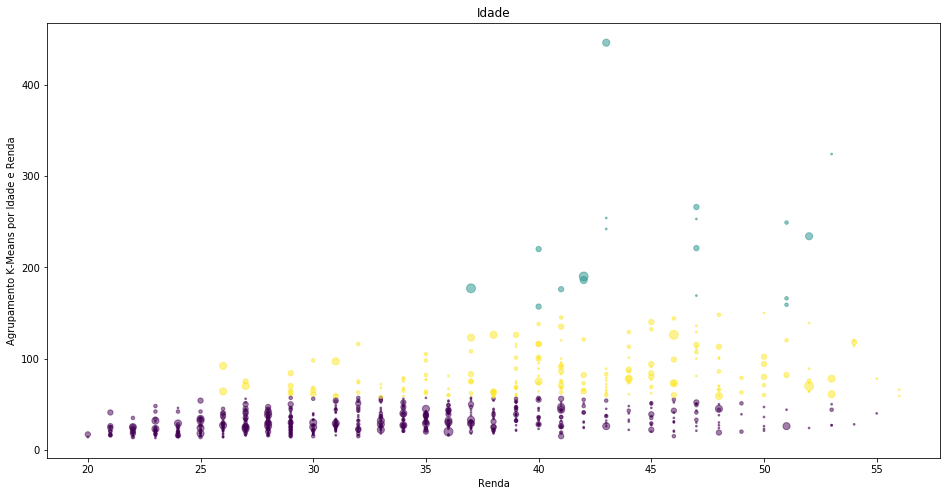

In [64]:
area = np.pi * (x[:, 1]) ** 2
plt.scatter(
    x[:, 0],
    x[:, 3], 
    s = area,
    c = labels.astype(np.float), alpha=0.5
)
configurar_plot('Idade', 'Renda', 'Agrupamento K-Means por Idade e Renda', 16, 8)

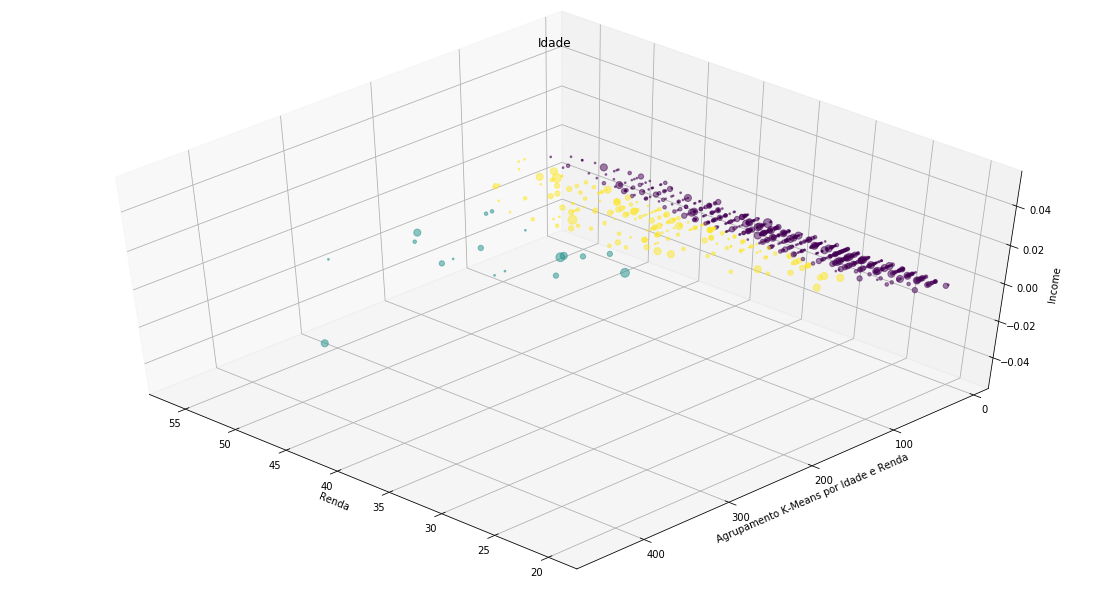

In [70]:
fig = plt.figure(1, figsize=(16, 8))
plt.clf()
ax = Axes3D(
    fig,
    rect = [0, 0, 0.95, 1], 
    elev = 48,
    azim = 134
)
plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
plt.scatter(
    x[:, 0],
    x[:, 3], 
    s = area,
    c = labels.astype(np.float), alpha=0.5
)
configurar_plot('Idade', 'Renda', 'Agrupamento K-Means por Idade e Renda', 16, 8)

## Agrupamento Hierárquico Aglomerativo

### Criando dados aleatórios e gerando um modelo

In [2]:
x1, y1 = make_blobs(
    n_samples = 50,
    centers = [[1,4], [1,3],[8,2], [1, -3]],
    cluster_std = 0.9
)

In [3]:
x1

array([[ 6.90790187,  0.6131657 ],
       [ 1.53387068, -3.83127882],
       [ 9.32199446,  1.61030628],
       [ 1.25293588, -2.54860671],
       [ 2.17766888,  1.7647669 ],
       [ 0.35146848, -2.05726589],
       [ 7.81332976,  0.44256859],
       [ 2.35441561,  3.85086849],
       [ 0.12696401, -2.35928493],
       [ 0.77971161,  3.87903821],
       [-0.31930962,  4.57712681],
       [ 8.96237427,  0.1474936 ],
       [ 1.91342446,  3.6026078 ],
       [ 8.40812638,  1.66543542],
       [ 0.13212397,  0.7267826 ],
       [ 1.99420843,  3.41442433],
       [ 2.31567272,  4.27830966],
       [ 1.09992738, -4.14671322],
       [ 1.2825212 ,  5.48259063],
       [ 7.62798665,  0.96532796],
       [ 2.10877126,  3.27757065],
       [ 1.66193097,  3.5052434 ],
       [ 1.45718626, -3.10501012],
       [ 1.68791554,  2.66650214],
       [ 0.92644764,  3.4880234 ],
       [ 1.24025576,  2.84494629],
       [ 1.99603658,  3.36904316],
       [ 0.95758285, -2.62432552],
       [ 1.41317874,

In [4]:
y1

array([2, 3, 2, 3, 1, 3, 2, 1, 3, 1, 0, 2, 0, 2, 1, 1, 0, 3, 0, 2, 0, 0,
       3, 1, 0, 1, 1, 3, 0, 3, 2, 1, 1, 3, 1, 2, 0, 1, 3, 2, 2, 2, 3, 0,
       0, 3, 1, 0, 0, 2])

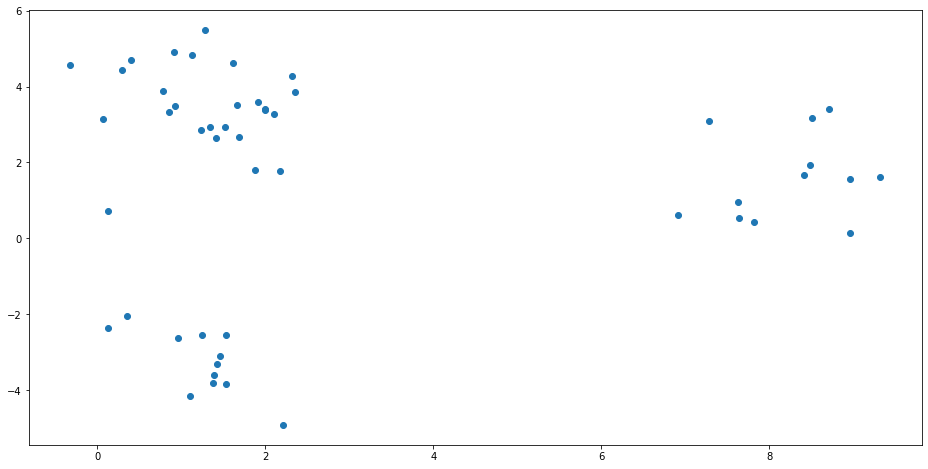

In [8]:
plt.scatter(x1[:, 0], x1[:, 1], marker='o')
configurar_plot('', '', '', 16, 8)

### Criando o modelo do agrupamento aglomerativo

In [11]:
aglomerativo = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
aglomerativo

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [12]:
aglomerativo.fit(x1, y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

### Criando um dendograma a partir de uma matriz de distância

In [17]:
matriz_distancia = distance_matrix(x1, x1)
matriz_distancia[0:15]

array([[ 0.        ,  6.97375783,  2.6119212 ,  6.47884598,  4.86839701,
         7.07940843,  0.92135934,  5.58721367,  7.40382206,  6.94410823,
         8.24291051,  2.10658665,  5.82078764,  1.83246969,  6.77673041,
         5.65609699,  5.87552966,  7.50926195,  7.4401752 ,  0.80158614,
         5.4891446 ,  5.99035259,  6.5981158 ,  5.60931795,  6.63646002,
         6.09122788,  5.63216489,  6.77404206,  5.85947787,  7.08682421,
         0.73752013,  5.16868141,  7.64033352,  6.74625834,  5.86650346,
         3.33405282,  7.1631087 ,  7.29204771,  6.93806516,  2.0522045 ,
         3.00572787,  2.26542472,  7.24007724,  6.63460796,  6.03179769,
         6.22681612,  6.62966943,  7.37160325,  7.67471285,  2.51519134],
       [ 6.97375783,  0.        ,  9.50082735,  1.31307734,  5.63295693,
         2.13194672,  7.59587901,  7.72584501,  2.0362103 ,  7.74711201,
         8.61020107,  8.42693868,  7.4435698 ,  8.80166228,  4.76873335,
         7.26031163,  8.147186  ,  0.53647521,  9.

In [23]:
z = hierarchy.linkage(matriz_distancia, 'complete')
z

c:\users\lord_negrisoli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([[15.        , 26.        ,  0.23868886,  2.        ],
       [ 1.        , 29.        ,  0.52185598,  2.        ],
       [25.        , 44.        ,  0.70049446,  2.        ],
       [24.        , 46.        ,  0.86135566,  2.        ],
       [20.        , 50.        ,  0.94284028,  3.        ],
       [ 3.        , 45.        ,  1.0846628 ,  2.        ],
       [36.        , 47.        ,  1.08579395,  2.        ],
       [13.        , 39.        ,  1.09022333,  2.        ],
       [ 6.        , 30.        ,  1.13213439,  2.        ],
       [32.        , 48.        ,  1.21016788,  2.        ],
       [23.        , 28.        ,  1.22563613,  2.        ],
       [12.        , 21.        ,  1.26765705,  2.        ],
       [34.        , 52.        ,  1.3248983 ,  3.        ],
       [22.        , 33.        ,  1.33335698,  2.        ],
       [ 4.        , 31.        ,  1.35506463,  2.        ],
       [38.        , 51.        ,  1.5240537 ,  3.        ],
       [35.        , 40.

### Plotando o dendograma com ligação completa

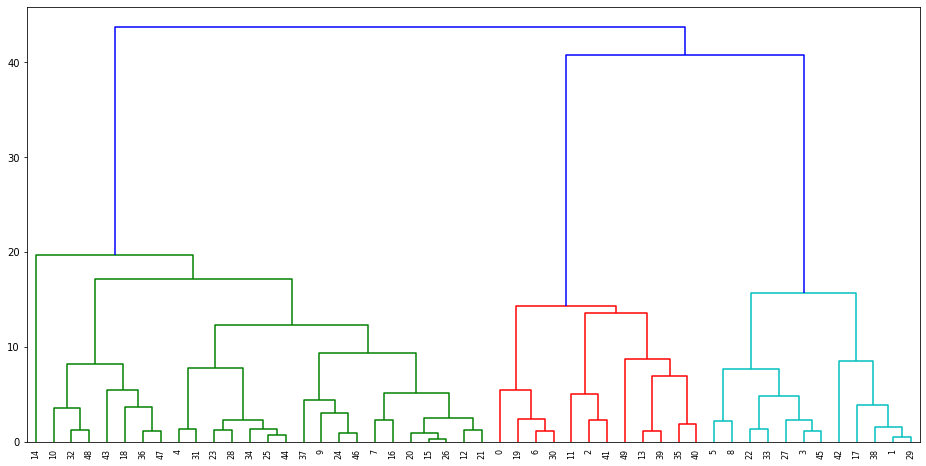

In [27]:
dendro = hierarchy.dendrogram(z)
configurar_plot('', '', '', 16, 8)

### Plotando o dendograma com ligação média

c:\users\lord_negrisoli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


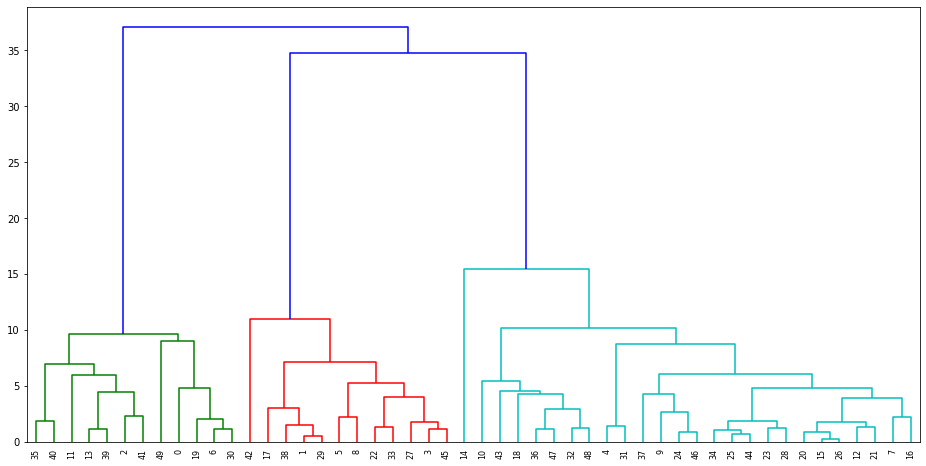

In [29]:
z = hierarchy.linkage(matriz_distancia, 'average')
dendro = hierarchy.dendrogram(z)
configurar_plot('', '', '', 16, 8)

### Agrupando um dataset de veículos

In [30]:
dados = pd.read_csv('dados/cars_clus.csv')
dados.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### Realizando o processo de Data Cleaning

In [39]:
dados[
    [
        'sales', 
        'resale',
        'type',
        'price',
        'engine_s',
        'horsepow',
        'wheelbas', 
        'width',
        'length',
        'curb_wgt',
        'fuel_cap',
        'mpg', 
        'lnsales'
    ]
] = dados [
    [
        'sales',
        'resale',
        'type',
        'price',
        'engine_s',
        'horsepow',
        'wheelbas',
        'width',
        'length',
        'curb_wgt',
        'fuel_cap',
        'mpg',
        'lnsales'
    ]
].apply(pd.to_numeric, errors = 'coerce')

dados = dados.dropna()
dados = dados.reset_index(drop=True)
dados.head()

,level_0,index,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,0,0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,1,1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,3,3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,4,4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,5,5,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [41]:
dados_feat = dados[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
dados_feat.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


### Normalizando os dados

In [44]:
x = dados_feat.values
min_max_scaler = MinMaxScaler()
feature = min_max_scaler.fit_transform(x)
feature[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

### Calculando a distância euclidiana entre os itens da matriz para gerar o dendograma

In [63]:
leng = feature.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature[i], feature[j])

c:\users\lord_negrisoli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  


### Criando os clusters e definindo a hierarquia

In [64]:
z = hierarchy.linkage(D, 'complete')

clusters = fcluster(z, 3, criterion='distance')
clusters

c:\users\lord_negrisoli\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [60]:
clusters = fcluster(z, 5, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

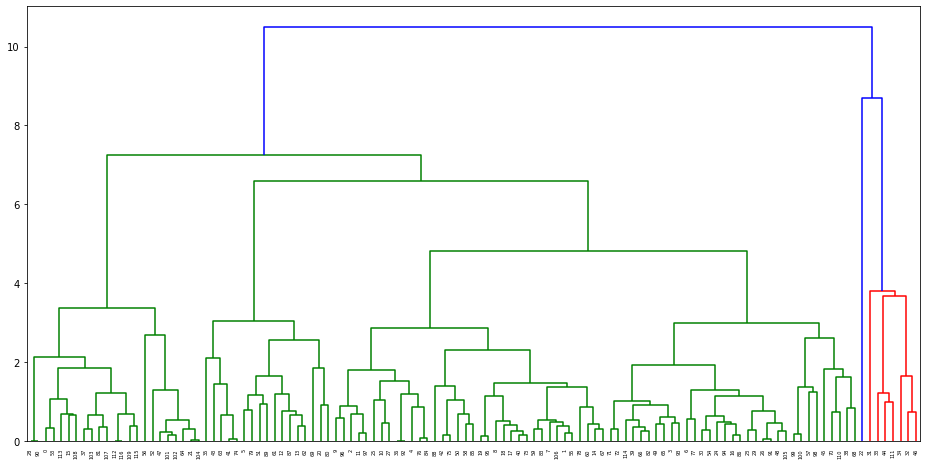

In [62]:
dendro = hierarchy.dendrogram(z)
configurar_plot('', '', '', 16, 8)